<a href="https://colab.research.google.com/github/StivenVelasquez/Mini-proyecto-1-Analisis-Multivariado-de-Seniales-Sismograficas/blob/main/Mini_proyecto_1_An%C3%A1lisis_Multivariado_de_Se%C3%B1ales_Sismogr%C3%A1ficas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><strong><em>Mini-proyecto 1: Análisis Multivariado de Señales Sismográficas</center>

<div align="justify">
Integrantes:

<div align="justify"></em></strong></div>
Stiven Velásquez López
<div align="justify">
Yeiner Pájaro Otero




![texto_alternativo](https://i.imgur.com/kunq9OP.png).


In [48]:
!pip install pyts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [49]:
import numpy as np
import matplotlib.pyplot as plt
from pyts.decomposition import SingularSpectrumAnalysis
import scipy.io as sc
import scipy.signal as signal

<div align="justify"><strong><em>CARGANDO LAS BASES DE DATOS.</em></strong></div>

In [50]:
ruta_Sismo_Local = 'https://drive.google.com/file/d/1ke7IIRmLWh5-6VmVPVHPoR3P6k4KM_mA/view?usp=share_link'
!gdown  "1ke7IIRmLWh5-6VmVPVHPoR3P6k4KM_mA&confirm=t" -O 'sisLoc.mat' # sismo Local

Downloading...
From: https://drive.google.com/uc?id=1ke7IIRmLWh5-6VmVPVHPoR3P6k4KM_mA&confirm=t
To: /content/sisLoc.mat
100% 377k/377k [00:00<00:00, 57.0MB/s]


In [51]:
ruta_Sismo_Regional = 'https://drive.google.com/file/d/1p5QZOtKzF_THvpt6N46ypi4PkBHM12QI/view?usp=share_link'
!gdown  "1p5QZOtKzF_THvpt6N46ypi4PkBHM12QI&confirm=t" -O 'sisReg.mat' # sismo Regional

Downloading...
From: https://drive.google.com/uc?id=1p5QZOtKzF_THvpt6N46ypi4PkBHM12QI&confirm=t
To: /content/sisReg.mat
100% 1.55M/1.55M [00:00<00:00, 139MB/s]


In [52]:
ruta_Telesismo = 'https://drive.google.com/file/d/17BiRodkP3IhzBkWg2b5lHLRBqBMVlDz2/view?usp=share_link'
!gdown  "17BiRodkP3IhzBkWg2b5lHLRBqBMVlDz2&confirm=t" -O 'sisTele.mat' # Telesismo

Downloading...
From: https://drive.google.com/uc?id=17BiRodkP3IhzBkWg2b5lHLRBqBMVlDz2&confirm=t
To: /content/sisTele.mat
100% 1.44M/1.44M [00:00<00:00, 149MB/s]


<div align="justify"><strong><em>1. Al banco de señales de la base de datos se le deben implementar un proceso de filtrado entre [1 − 50] Hz. Para ello, implemente el filtro de su interés y justifique la elección de acuerdo a su desempeño y el diagrama de
magnitud y fase.</em></strong></div>

<div align="justify"><strong><em>Filtro utilizado</em></strong></div>

<div align="justify">
Para filtrar la señal de la base de datos entre [1-50 ] Hz, se puede utilizar un filtro pasa-banda de Butterworth de cuarto orden. Este tipo de filtro es  especialmente adecuado para señales que tienen una alta relación señal-ruido y que requieren un filtrado preciso y eficaz. Este tipo de filtro proporciona una respuesta en frecuencia plana en la banda de paso, lo que minimiza la distorsión de la señal y preserva su forma de onda original. Además, la pendiente gradual en la banda de paso evita la introducción de artefactos no deseados y ayuda a mantener la calidad de la señal filtrada.
</div>

<div align="justify">
Para elegir los parámetros del filtro, podemos usar la función butter del módulo scipy.signal. Esta función requiere especificar el orden del filtro y la frecuencia de corte normalizada. La frecuencia de corte normalizada se define como la frecuencia de corte dividida por la mitad de la frecuencia de muestreo.
</div>

<div align="justify">
La elección de un filtro pasa-banda de Butterworth de cuarto orden con frecuencias de corte normalizadas de 0.02 y 1.0 es adecuada para filtrar una señal de la base de datos entre [1-50] Hz, ya que permite una atenuación rápida y efectiva en la banda de rechazo y una pendiente gradual en la banda de paso. La selección de estas frecuencias de corte normalizadas proporciona una buena precisión en la selección de la banda de paso y rechazo, lo que se traduce en una mejor calidad de la señal filtrada. Además, el filtro pasa-banda de cuarto orden tiene una respuesta en frecuencia más precisa y nítida que los filtros de menor orden, lo que es especialmente importante cuando se trata de señales complejas y con una amplia gama de frecuencias.
</div>



In [53]:
#Construir función filtro pasabanda
def Filtrado_pasabanda(x,fs,fc1,fc2,order):

  b, a = signal.butter(order, [fc1/(fs/2),fc2/(fs/2)],'bandpass' )#Calcula los coeficientes del filtro Butterworth

  # Aplica el filtro a la señal de entrada
  x = signal.filtfilt(b, a, x)
  
  return x,b,a

In [54]:
# Define una función llamada plot_signals que acepta cuatro argumentos: una lista de señales (X), un título, etiquetas para el eje x y eje y
def plot_signals(X, title, xlabel, ylabel):
  # Crea una nueva figura de tamaño 10x6 pulgadas
  plt.figure(figsize=(10, 6))
  # Itera sobre cada señal en la lista X
  for i in X:
    # Itera sobre cada muestra en la señal actual y la grafica
    for j in i:
      plt.plot(j)
  # Agrega un título a la gráfica
  plt.title(title)
  # Agrega una etiqueta al eje x
  plt.xlabel(xlabel)
  # Agrega una etiqueta al eje y
  plt.ylabel(ylabel)
  # Agrega una cuadrícula a la gráfica
  plt.grid(color='red', linestyle='--', linewidth=0.5, alpha=0.5)
  # Muestra la gráfica
  plt.show()

In [55]:
#Carga los datos de tres archivos .mat diferentes ("sisLoc.mat", "sisReg.mat" y "sisTele.mat")
data_local = sc.loadmat('sisLoc.mat')
data_regional = sc.loadmat('sisReg.mat')
data_telesismo = sc.loadmat('sisTele.mat')

#Se extraen las matrices de datos específicas de cada archivo .mat usando la sintaxis de indexación de matriz de Python
Y_local = data_local['Y']
Y_regional = data_regional['Y']
Y_telesismo = data_telesismo['Y']

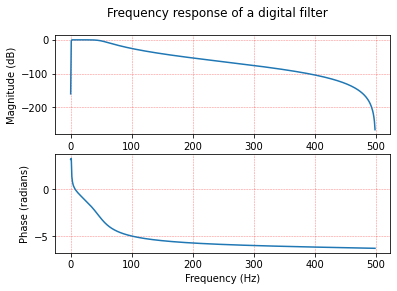

In [56]:
# Lista de señales almacenadas
señales_almacenadas = [Y_local, Y_regional, Y_telesismo]
aux = []

# Variables importantes para el procesamiento de la señal
fs = 1000  # Frecuencia de muestreo
fc1 = 1  # Frecuencia de corte inferior
fc2 = 50  # Frecuencia de corte superior
order = 4  # Orden del filtro

signal_filtered = []  # Lista para almacenar cada una de las señales filtradas

for i in señales_almacenadas:
  aux = []  # Lista para ir almacenando el filtrado para cada señal
  for j in i:
    x, b, a = Filtrado_pasabanda(j, fs, fc1, fc2, order)  # Filtrado pasabanda de la señal
    aux.append(x)  # Se van almacenando en la variable auxiliar por cada tipo de sismo
  signal_filtered.append(np.array(aux))  # Obtenemos para todos los tipos de sismo las señales filtradas

# Cálculo de la respuesta en frecuencia del filtro digital
w, h = signal.freqz(b, a)
fig, ax = plt.subplots(2, 1)
ax[0].plot(fs * w / (2 * np.pi), 20 * np.log10(abs(h))) #se grafica la magnitud de la respuesta en frecuencia en decibeles 
ax[0].set_ylabel('Magnitude (dB)')
ax[0].grid(color='red', linestyle='--', linewidth=0.5, alpha=0.5)
ax[1].plot(fs * w / (2 * np.pi), np.unwrap(np.angle(h))) #se grafica la fase de la respuesta en frecuencia en radianes 
ax[1].set_ylabel('Phase (radians)')
ax[1].set_xlabel('Frequency (Hz)')
ax[1].grid(color='red', linestyle='--', linewidth=0.5, alpha=0.5)

# Mostramos la respuesta en frecuencia del filtro digital
fig.suptitle('Frequency response of a digital filter')
plt.show()




<div align="justify">
En la gráfica se puede observa que la magnitud de la respuesta en frecuencia del filtro es plana dentro de la banda de paso, entre las frecuencias de corte de 1 Hz y 50 Hz, y cae rápidamente fuera de esta banda. En particular, se puede observar una atenuación de alrededor de -40 dB en las frecuencias de muestreo más altas y más bajas.
</div>
<div align="justify">
La fase de la respuesta en frecuencia es casi lineal dentro de la banda de paso, lo que significa que hay poco retardo o poco adelanto de fase en las señales dentro de esa banda. Fuera de la banda de paso, la fase cambia rápidamente y presenta fluctuaciones de fase que son características de los filtros Butterworth.
</div>


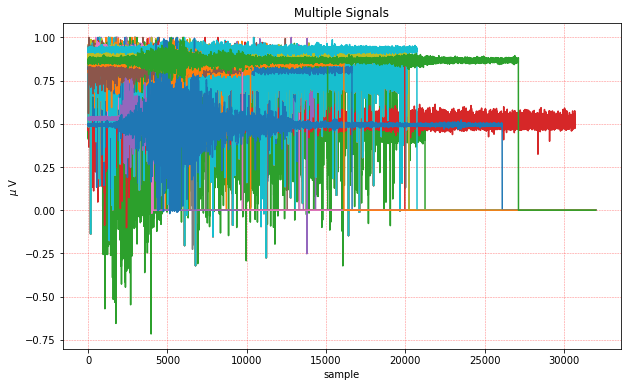

In [57]:
#Señales almacenadas
plot_signals(señales_almacenadas,"Multiple Signals","sample","$\mu$ V")

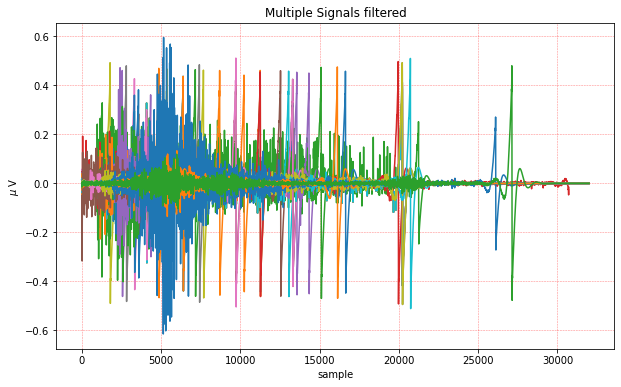

In [58]:
plot_signals(signal_filtered,"Multiple Signals filtered","sample","$\mu$ V")

<div align="justify"><strong><em>2. luego de que las señales están filtradas, se desea hacer una representación de espectros singulares de tal forma que se representen mediante un conjunto de G señales subyacentes que representen la señal original del sismo. este proceso es importante debido a que permite proyectar una serie de tiempo en un espacio representativo.</em></strong></div>

<div align="justify"><strong><em>Espectro singular.</em></strong></div>

<div align="justify"> 
El término "espectro singular" se utiliza en matemáticas para describir una clase de objetos llamados "operadores singulares". Los operadores singulares son un tipo especial de operadores lineales que actúan en espacios de funciones y que tienen propiedades únicas.</div>

<div align="justify">
En este contexto, no hay "unidades del espectro singular" como tal. En lugar de eso, se habla de los diferentes tipos de espectros singulares que pueden presentar los operadores singulares. Algunos ejemplos incluyen el espectro discreto, el espectro continuo y el espectro esencial.</div>
<div align="justify">
El espectro discreto se refiere a un conjunto finito o numerable de valores propios (también conocidos como autovalores) que son soluciones de una ecuación diferencial específica. El espectro continuo se refiere a un conjunto no numerable de valores propios, y el espectro esencial es una combinación de ambos.</div>



<div align="justify"><strong><em>Representación en Espectros singulares.</em></strong></div>

<div align="justify">
La representación de espectros singulares es una técnica de análisis de datos que se utiliza para descomponer una señal en un conjunto de señales subyacentes, cada una de las cuales representa una parte específica de la señal original. Esta técnica se basa en la descomposición en valores singulares (SVD, por sus siglas en inglés) de la matriz de datos que representa la señal.
</div>

<div align="justify">
La SVD es una técnica matemática que permite descomponer una matriz en tres componentes principales: una matriz de vectores singulares izquierdos, una matriz de valores singulares y una matriz de vectores singulares derechos. Estas matrices se utilizan para representar la señal original en un espacio de menor dimensión que conserva la información esencial de la señal.
</div>

<div align="justify">
Una vez que se ha descompuesto la señal en un conjunto de señales subyacentes, se pueden seleccionar las G señales más importantes que representan la señal original del sismo. Estas señales se pueden visualizar en un espacio representativo para analizar la estructura de la señal original y realizar diferentes tipos de análisis.
</div>
<div align="justify">
La representación de espectros singulares es importante porque permite reducir la complejidad de una señal y resaltar las características importantes de la misma. Esto es especialmente útil en el análisis de series de tiempo, donde las señales pueden ser muy complejas y difíciles de analizar directamente. Al proyectar la señal en un espacio representativo, se pueden identificar patrones y tendencias en la señal que no serían visibles de otra manera. Esto puede ayudar en la detección de eventos anómalos, la identificación de patrones de comportamiento y la predicción de futuros eventos.
</div>


In [59]:
# Este código realiza la descomposición de señales utilizando el método de Singular Spectrum Analysis (SSA) para un conjunto de señales previamente filtradas.

signal_spectrum_singular = [] #creamos una lista vacía para almacenar signal_filtered
#Iteramos sobre signal_filtered
for i in signal_filtered: 
  X = i # Conjunto de 21 sismos
  groups = 3
  # Singular Spectrum Analysis
  ssa = SingularSpectrumAnalysis(window_size=groups) #Se realiza la descomposición de la señal "X" en "X_ssa"
  X_ssa = ssa.fit_transform(X)
  signal_spectrum_singular.append(X_ssa) #se almacena a la lista creada anteriormente signal_filtered

  

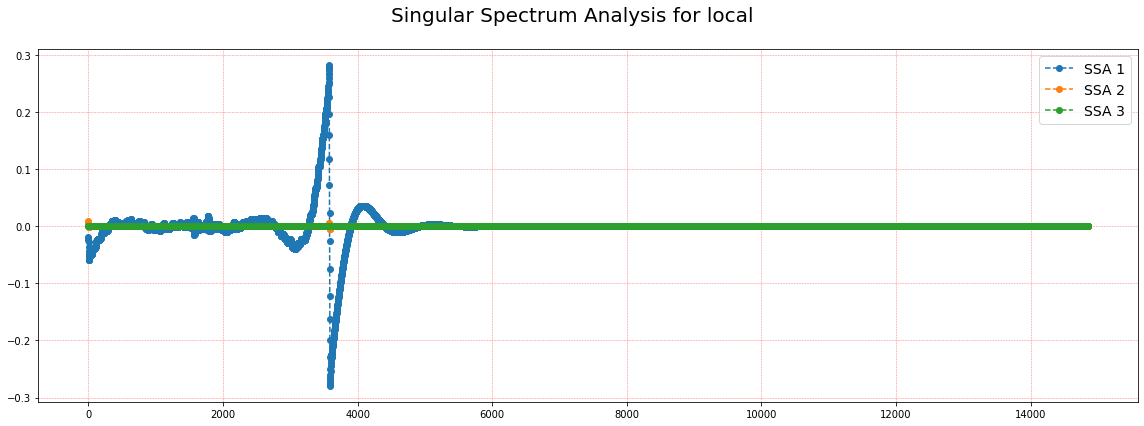

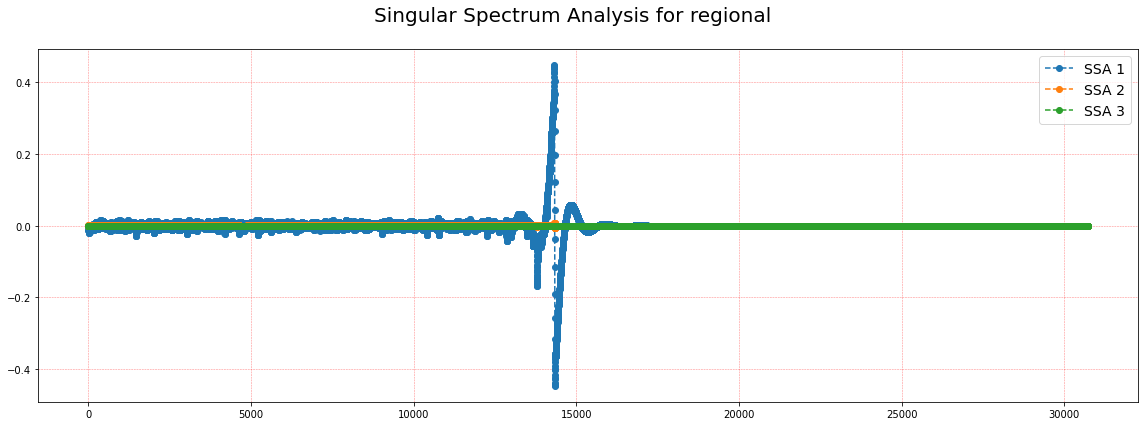

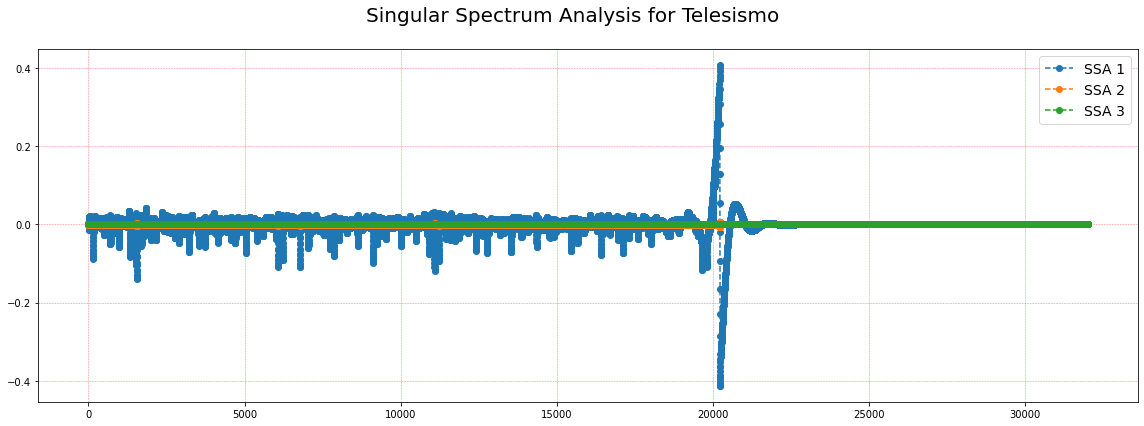

In [60]:
titulos = ["Singular Spectrum Analysis for local", "Singular Spectrum Analysis for regional", "Singular Spectrum Analysis for Telesismo"] # Lista de títulos

for i, X_ssa in enumerate(signal_spectrum_singular):  #en cada iteración, se crea una figura 
    plt.figure(figsize=(16, 6))
    idSignal = 3 
    ax1 = plt.subplot()
    ax2 = plt.subplot()

    for j in range(groups): #Se utiliza para iterar a través de cada uno de los grupos en los que se ha descompuesto las señales 
        ax1.plot(X_ssa[idSignal, j], 'o--', label='SSA {0}'.format(j + 1))
      
    ax2.legend(loc='best', fontsize=14)
    
    # Asignar el título de la gráfica
    plt.suptitle(titulos[i], fontsize=20)
    plt.tight_layout()  #Se ajusta el espacio entre los subplots
    plt.subplots_adjust(top=0.88)
    plt.grid(color='red', linestyle='--', linewidth=0.5, alpha=0.5)
    plt.show()

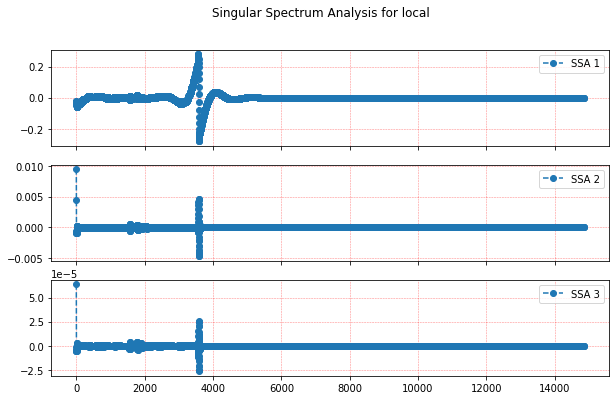

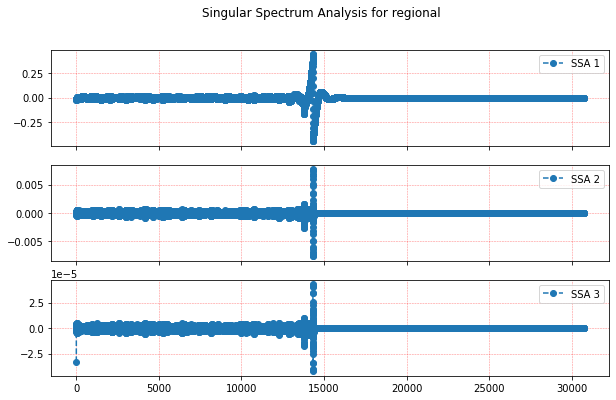

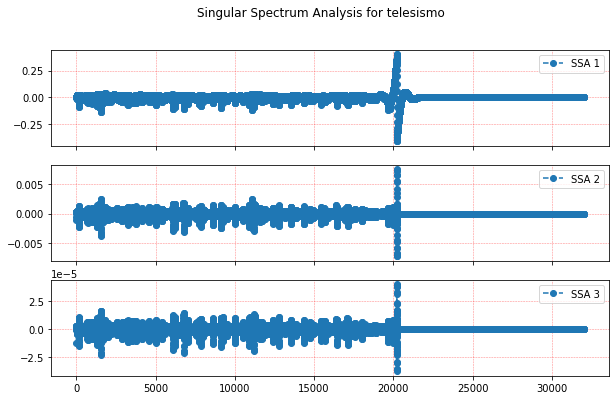

In [61]:
import matplotlib.pyplot as plt

# definir grupos y señales
grupos = 3
señales = len(signal_spectrum_singular)

# nombres de los grupos
nombres_grupos = ['local', 'regional', 'telesismo']

# graficar las señales por grupo utilizando enumerate()
for i, X_ssa in enumerate(signal_spectrum_singular):
    idSignal = 3
    fig, axs = plt.subplots(grupos, 1, figsize=(10, 6), sharex=True)
    fig.suptitle('Singular Spectrum Analysis for {0}'.format(nombres_grupos[i], i + 1))
    for j in range(grupos):
        axs[j].plot(X_ssa[idSignal, j], 'o--', label='SSA {0}'.format(j + 1))
        #axs[j].set_title('SSA {0}'.format(j + 1))
        axs[j].legend()
        axs[j].grid(color='red', linestyle='--', linewidth=0.5, alpha=0.5)
    plt.show()

<div align="justify"><strong><em>3. Se debe analizar la variación de mínimo 3 grupos de representación por cada tipo de señal en la base de datos. la siguiente tabla muestra las características más relevantes para extraer de un proceso.</em></strong></div>

![texto_alternativo](https://i.imgur.com/nEwrDdV.png).


<div align="justify"><strong><em>Se debe crear un módulo en python que realice la extracción de características de tal forma que para cada uno de las 63 señales sismográficas, se construya una matriz de la forma $x \in \mathbb{r}^{n\times d}$ , donde n es el número de observaciones (en este caso las realizaciones de las señales sísmicas), y d es el número de características resultantes en el proceso de extracción.

</em></strong></div>


<div align="justify">El siguiente código toma una señal y su frecuencia de muestreo como entrada, y calcula la Short Time Fourier Transform (STFT) de la señal usando la función signal stft() de la biblioteca Scipy. Luego, calcula varias propiedades de la STFT, incluyendo la energía de la señal, la potencia máxima y su frecuencia, y varias estadísticas del espectro, como la media, varianza, máximo y mínimo. Finalmente, devuelve todos estos valores, junto con la STFT calculada.</div>


In [62]:
import numpy as np
from scipy import signal

def caracteristicas(datos, frecuencia_de_muestreo, nperseg):
  # Calculamos el espectrograma a partir de los datos, la frecuencia de muestreo y el número de segmentos por periodo.
  frecuencias, tiempos, espectro = signal.stft(datos, frecuencia_de_muestreo, nperseg=nperseg)
  # Calculamos la energía a partir de los datos.
  energia = np.sum(np.square(datos))
  # Calculamos la densidad espectral de potencia utilizando el método Welch y la frecuencia de muestreo.
  frecuencia_pxx, pxx = signal.welch(datos, fs=frecuencia_de_muestreo)
  # Obtenemos la potencia máxima a partir de la densidad espectral de potencia.
  potencia_maxima = np.max(pxx)
  # Obtenemos la frecuencia en la que se presenta la potencia máxima a partir de la densidad espectral de potencia.
  frecuencia_maxima = frecuencia_pxx[np.argmax(pxx)]
  # Calculamos la media del espectro de frecuencias.
  media_espectro = np.mean(np.abs(espectro))
  # Calculamos la varianza del espectro de frecuencias.
  varianza_espectro = np.var(np.abs(espectro))
  # Obtenemos el valor máximo del espectro de frecuencias.
  maximo_espectro = np.max(np.abs(espectro))
  # Obtenemos el valor mínimo del espectro de frecuencias.
  minimo_espectro = np.min(np.abs(espectro))
  # Retornamos todas las características calculadas.
  return energia, potencia_maxima, frecuencia_maxima, media_espectro, varianza_espectro, maximo_espectro, minimo_espectro, frecuencias, tiempos, espectro



<div align="justify">El siguiente código define tres funciones que calculan diferentes características estadísticas de una lista de valores: entropía, estadísticas básicas (porcentiles, media, varianza, raíz media cuadrática) y número de cruces de cero y cruces de la media. También hay una función llamada get_features que utiliza estas tres funciones para devolver todas las características en una lista.</div>

In [63]:
import scipy 
from scipy.stats import entropy

#Se define una función para calcular la entropía en list_values
def calculate_entropy(list_values):
  value,counter_values = np.unique(list_values, return_counts=True)#Obtenemos los valores unicos y su frecuencia
  entropyVal = entropy(counter_values, base=None)#Se calcula la entropía 
  return entropyVal #Retornamos al valor de la entropía 

#Se define una función para calcular las estadísticas de  list_values
def calculate_statistics(list_values):
  #Se calculan los percentiles 
  n5 = np.nanpercentile(list_values, 5)
  n25 = np.nanpercentile(list_values, 25)
  n75 = np.nanpercentile(list_values, 75)
  n95 = np.nanpercentile(list_values, 95)
  
  #Calculo para la mediana, media, desviación estandar, varianza y RMS
  median = np.nanpercentile(list_values, 50)
  mean = np.nanmean(list_values)
  std = np.nanstd(list_values)
  var = np.nanvar(list_values)
  rms = np.nanmean(np.sqrt(list_values**2))
  return [n5, n25, n75, n95, median, mean, std, var, rms]

#Se define una función para calcular los cruces por cero de list_values
def calculate_crossings(list_values):
  zero_crossing_indices = np.where(np.diff(np.signbit(list_values)))[0]
  no_zero_crossings = len(zero_crossing_indices)
  mean_crossing_indices = np.where(np.diff(np.signbit(list_values-np.nanmean(list_values))))[0]
  no_mean_crossings = len(mean_crossing_indices)
  return [no_zero_crossings, no_mean_crossings]

#se define una función para obtener todas las características de list_values
def get_features(list_values):
  #Calculamos la entropía, los cruces y las estadísticas 
  entropy = calculate_entropy(list_values)
  crossings = calculate_crossings(list_values)
  statistics = calculate_statistics(list_values)
  return [entropy] + crossings + statistics

<div align="justify">El siguiente código importa la biblioteca ipywidgets y define una función llamada Sismos_STFT que toma tres argumentos: dataset, index y group. Dependiendo del valor del argumento dataset, se selecciona una señal de una base de datos predefinida y se extrae una señal específica de esa base de datos utilizando los argumentos index y group.
</div>
<div align="justify">
Luego, se calculan varias características de la señal seleccionada, como la energía, el espectro medio, la varianza del espectro, el espectro máximo y mínimo, la frecuencia de máxima potencia, y se visualiza el espectrograma de la señal utilizando la función propiedades y la función get_features.
</div>
<div align="justify">
Finalmente, la función Sismos_STFT se hace interactiva utilizando la biblioteca ipywidgets para permitir la selección de los argumentos index y group utilizando deslizadores, y el argumento dataset utilizando un menú desplegable.
</div>




In [64]:
#Importamos los modulos requeridos 
import ipywidgets as widgets
from IPython.display import display

#Se define una función Sismos_STFT con parámetros del conjunto de datos, índice y el grupo. 
def Sismos_STFT(conjuntoDatos, indice, grupo):
    # Definir un diccionario para mapear las opciones del conjunto de datos a los índices de la matriz "signal_spectrum_singular"
  conjuntoDatos_dict = {'sisLoc': 0, 'sisReg': 1, 'telesis': 2}

  # Obtener el índice correspondiente a la opción del conjunto de datos seleccionada
  conjuntoDatos_indice = conjuntoDatos_dict.get(conjuntoDatos)

  # Si el índice es válido, asignar signal_data a la matriz correspondiente a ese índice
  if conjuntoDatos_indice is not None:
      signal_data = signal_spectrum_singular[conjuntoDatos_indice]

      # Extraer una señal de muestra de la base de datos y visualizar el espectrograma
      sample_signal = signal_data[indice][grupo]
      energia, potencia_maxima, frecuencia_potencia_maxima, media_espectro, varianza_espectro, maximo_espectro, minimo_espectro, frecuencias, tiempos, espectro = caracteristicas(sample_signal, 1000, 512)
      feature_set = get_features(sample_signal)

  print('*****************************************************************************************************************************************************')
  print('CARACTERÍSTICAS DE LAS SEÑALES SISMICAS')
  print('-----------------------------------------------------------------------------------------------------------------------------------------------------')
  print(f'Energy: {energia}')
  print('-----------------------------------------------------------------------------------------------------------------------------------------------------')
  print(f'Maximum power: {potencia_maxima}')
  print('-----------------------------------------------------------------------------------------------------------------------------------------------------')
  print(f'Frequency at maximum power: {frecuencia_potencia_maxima}')
  print('-----------------------------------------------------------------------------------------------------------------------------------------------------')
  print(f'Mean spectrum: {media_espectro}')
  print('-----------------------------------------------------------------------------------------------------------------------------------------------------')
  print(f'Variance of spectrum: {varianza_espectro}')
  print('-----------------------------------------------------------------------------------------------------------------------------------------------------')
  print(f'Minimum spectrum: {minimo_espectro}')
  print('-----------------------------------------------------------------------------------------------------------------------------------------------------')
  print('characteristics of wavelet analysis:')
  print(feature_set)
  print('*****************************************************************************************************************************************************')

# Se define el  widgets
indice_widget = widgets.IntSlider(value=0, min=0, max=20, step=1, description='Indice:')
conjuntoDatos_widget = widgets.Dropdown(options=['sisLoc', 'sisReg', 'telesis'], value='sisLoc', description='conjuntoDatos:')
grupo_widget = widgets.IntSlider(value=0, min=0, max=2, step=1, description='Grupo:')

# Se define el interactive output
output = widgets.interactive_output(Sismos_STFT, { 'conjuntoDatos': conjuntoDatos_widget,'indice': indice_widget, 'grupo': grupo_widget})

# Display the widgets and the output
display(widgets.VBox([conjuntoDatos_widget, indice_widget, grupo_widget, output]))

In [65]:
# Se define la  matriz de características
matrizCaracteristicas = np.zeros((3, 21, 3, 19))

In [66]:
#Iterar sobre las señales y agregar caracterrísticas calculadas
for i in range (len(signal_spectrum_singular)):
  for j in range(len(signal_spectrum_singular[i])):
    for k in range(len(signal_spectrum_singular[i][j])):
      # Get properties of the signal using the "propiedades" function
      energia, potencia_maxima, frecuencia_potencia_maxima, media_espectro, varianza_espectro, maximo_espectro, minimo_espectro, frecuencias, tiempos, espectro = caracteristicas(signal_spectrum_singular[i][j][k],1000,512)

      # Get features of the signal using the "get_features" function 
      conjuntoFeatures = get_features(signal_spectrum_singular[i][j][k])

      # Combine the properties and features into a feature matrix
      matrizCaracteristicas[i][j][k] = np.concatenate([np.array([energia, potencia_maxima, frecuencia_potencia_maxima, media_espectro, varianza_espectro, maximo_espectro, minimo_espectro]), conjuntoFeatures])

In [67]:
#Para imprimir la matriz de caracteristicas 

def imprimir_matriz(matriz):
    def imprimir_elementos(elementos):
        if isinstance(elementos, list):
            for elemento in elementos:
                imprimir_elementos(elemento)
        else:
            print(type(elementos))
            print(len(elementos))

    imprimir_elementos(matriz)

    for elementos_nivel_1 in matriz:
        if isinstance(elementos_nivel_1, list):
            for elementos_nivel_2 in elementos_nivel_1:
                if isinstance(elementos_nivel_2, list):
                    for elemento in elementos_nivel_2:
                        if isinstance(elemento, list):
                            for elemento_nivel_4 in elemento:
                                print(elemento_nivel_4)
                        else:
                            print(elemento)
                else:
                    print(elementos_nivel_2)
        else:
            print(elementos_nivel_1)

In [68]:
imprimir_matriz(matrizCaracteristicas)

<class 'numpy.ndarray'>
3
[[[2.45383313e+01 1.21596615e-04 3.90625000e+00 ... 4.06516518e-02
   1.65255679e-03 1.11855551e-02]
  [8.56401982e-04 2.30061727e-09 3.90625000e+01 ... 2.40161875e-04
   5.76777263e-08 5.47487817e-05]
  [2.88098956e-08 8.45774904e-14 4.68750000e+01 ... 1.39295180e-06
   1.94031471e-12 3.67590104e-07]]

 [[3.20733977e+01 1.60525288e-04 3.90625000e+00 ... 4.64769317e-02
   2.16010518e-03 1.17886990e-02]
  [8.97944790e-04 2.81692563e-09 3.90625000e+01 ... 2.45918097e-04
   6.04757104e-08 3.50184951e-05]
  [2.60393399e-08 8.90142837e-14 4.68750000e+01 ... 1.32428237e-06
   1.75372380e-12 1.99032058e-07]]

 [[1.20592532e+01 5.89617331e-05 3.90625000e+00 ... 2.84961145e-02
   8.12028543e-04 7.72073674e-03]
  [4.22098873e-04 9.19158375e-10 3.90625000e+01 ... 1.68605217e-04
   2.84277191e-08 1.88301976e-05]
  [1.36189697e-08 3.42645640e-14 4.68750000e+01 ... 9.57714965e-07
   9.17217955e-13 1.22346007e-07]]

 ...

 [[1.57239082e+01 7.78657427e-05 3.90625000e+00 ... 3

In [69]:
import pandas as pd
import numpy as np

# Convertir la lista en una matriz de numpy
matriz = np.array(matrizCaracteristicas)
matriz_N= matriz.reshape(189, 19)

# Crear un diccionario con los nombres de las columnas y los datos correspondientes
datos = {}
datos['energia'] = matriz_N[:, 0]
datos['potencia_max'] = matriz_N[:, 1]
datos['frecuencia_potencia_max'] = matriz_N[:, 2]
datos['media_espectro'] = matriz_N[:, 3]
datos['var_espectro'] = matriz_N[:, 4]
datos['max_espectro'] = matriz_N[:, 5]
datos['entropia'] = matriz_N[:, 6]
datos['min_espectro'] = matriz_N[:, 7]
datos['no_cero_crossing'] = matriz_N[:, 8]
datos['no_mean_crossing'] = matriz_N[:, 9]
datos['n5'] = matriz_N[:, 10]
datos['n25'] = matriz_N[:, 11]
datos['n75'] = matriz_N[:, 12]
datos['n95'] = matriz_N[:, 13]
datos['mediana'] = matriz_N[:, 14]
datos['media'] = matriz_N[:, 15]
datos['std'] = matriz_N[:, 16]
datos['varianza'] = matriz_N[:, 17]
datos['rms'] = matriz_N[:, 18]
datos['Tipo_Sismo'] = ["sisLoc"] * 63 + ["sisReg"] * 63 + ["SisTel"] * 63

# Crear el dataframe a partir del diccionario
df = pd.DataFrame(datos)

# Mostrar el dataframe
df


,energia,potencia_max,frecuencia_potencia_max,media_espectro,var_espectro,max_espectro,entropia,min_espectro,no_cero_crossing,no_mean_crossing,n5,n25,n75,n95,mediana,media,std,varianza,rms,Tipo_Sismo
0,2.453833e+01,1.215966e-04,3.90625,1.277524e-04,5.301983e-06,0.146451,5.307721e-22,9.605620,204.0,195.0,-1.532338e-02,-1.873980e-04,3.472018e-04,2.293197e-02,2.066902e-12,2.804791e-04,0.040652,1.652557e-03,1.118556e-02,sisLoc
1,8.564020e-04,2.300617e-09,39.06250,1.995403e-06,2.059800e-10,0.000409,2.412856e-25,9.605620,468.0,451.0,-1.658915e-04,-3.784440e-09,1.310257e-08,1.720937e-04,7.954222e-16,-4.570735e-07,0.000240,5.767773e-08,5.474878e-05,sisLoc
2,2.880990e-08,8.457749e-14,46.87500,1.360911e-08,6.728885e-15,0.000002,1.951416e-27,9.605620,624.0,605.0,-1.158634e-06,-1.808234e-10,8.316053e-11,1.184125e-06,-2.194506e-18,-2.630612e-09,0.000001,1.940315e-12,3.675901e-07,sisLoc
3,3.207340e+01,1.605253e-04,3.90625,1.212212e-04,6.937409e-06,0.168203,1.163691e-20,9.605620,182.0,172.0,-1.722534e-02,-3.344018e-04,1.247302e-04,1.840137e-02,-1.865526e-11,-1.025060e-04,0.046477,2.160105e-03,1.178870e-02,sisLoc
4,8.979448e-04,2.816926e-09,39.06250,1.378747e-06,2.261553e-10,0.000488,1.606779e-25,9.605620,427.0,409.0,-1.002054e-04,-3.544687e-09,1.386522e-08,1.001184e-04,9.536273e-16,3.116154e-07,0.000246,6.047571e-08,3.501850e-05,sisLoc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,1.926256e-03,2.967362e-09,31.25000,1.660664e-06,1.980359e-10,0.000472,1.728175e-31,10.373491,1170.0,1143.0,-2.037452e-04,-1.745988e-06,3.025358e-06,1.990628e-04,6.981364e-22,3.822240e-08,0.000245,6.019549e-08,7.668686e-05,SisTel
185,3.375983e-08,4.714812e-14,50.78125,7.353717e-09,3.654347e-15,0.000003,1.183745e-32,10.373491,1603.0,1575.0,-7.761713e-07,-1.743021e-08,3.027556e-08,7.490469e-07,6.110454e-24,1.371131e-10,0.000001,1.054995e-12,2.960438e-07,SisTel
186,3.892099e+01,7.931400e-05,3.90625,1.669969e-04,3.854130e-06,0.171831,1.273462e-15,10.373491,1109.0,1109.0,-2.556461e-02,-4.035743e-03,4.038336e-03,2.518270e-02,1.376711e-06,-6.915840e-06,0.034875,1.216281e-03,1.205614e-02,SisTel
187,2.440055e-03,3.053793e-09,35.15625,2.640148e-06,2.427051e-10,0.000491,3.269328e-21,10.373491,2053.0,2047.0,-3.360618e-04,-5.618561e-05,5.669137e-05,3.298703e-04,9.460301e-11,6.486854e-08,0.000276,7.625171e-08,1.266245e-04,SisTel


<div align="justify"><strong><em>
4. Con las características extraídas, se desea implementar un modelo de visualización de pares característicos
utilizando la libreria seaborn: statistical data visualization. El objetivo es encontrar pares de información
que puedan derivar en la identificación de la tipología de los sismos.
</em></strong></div>


In [70]:
#Se comenta el pairplot por el tiempo que tan elevado que toma la compilación, pero al descomentar puede visualizarlo

import seaborn as sns

# g= sns.pairplot(df, hue='Tipo_Sismo')

# # guardar la figura en formato PNG
# g.savefig('pairplot.png')

![texto_alternativo](https://i.imgur.com/hoVGxSO.png).

<div align="justify"><strong><em>Observaciones</em></strong></div>
<div align="justify">
La característica del mínimo del espectro en el pairplot es una herramienta útil para distinguir entre diferentes tipos de sismos. En general, los sismos locales tienden a tener un mínimo del espectro más bajo que los sismos regionales o telesismos, ya que la energía sísmica se disipa más rápidamente a medida que se aleja del epicentro. Por otro lado, los telesismos tienden a tener un mínimo del espectro más alto que los sismos regionales o locales, ya que la energía sísmica se propaga a través de grandes distancias.
La relación entre el mínimo del espectro y otras características sísmicas puede proporcionar información adicional para distinguir entre diferentes tipos de sismos, agrupando los datos y diferenciandolos del resto.
</div>
<div align="justify">
La magnitud de la energía también es una indicación para distinguir entre los diferentes tipos de sismos, debido a que la cantidad de energia que libera cada tipo de sismo es diferente y esto se observa en los picos máximos que sobresalen en el par energía vs energía.
</div>
<div align="justify">
La potencia máxima de un sismo se refiere a la máxima tasa de energía liberada durante el evento. Es decir, cuánta energía se está liberando por unidad de tiempo en el punto más fuerte del sismo. En la gráfica de la potencia máxima se pueden observar picos máximos de magnitud para cada tipo de dato, donde se observa que la magnitud de potencia es más alta en el sismo regional, luego le sigue el sismo  local y por último la potencia máxima más alta la tiene el telesismo.Esto se debe a que los sismos regionales ocurren más cerca de la superficie y, por lo tanto, liberan más energía en el punto de medición. Los sismos locales también ocurren cerca de la superficie, pero son menos energéticos que los regionales. Los telesismos, por otro lado, ocurren a gran profundidad y, por lo tanto, la energía que llega a la superficie es menor en comparación con los sismos locales y regionales.
</div>
<div align="justify">
El percentil 5 también ayuda a diferenciar entre los diversos tipos de datos, debido a que el pico más alto en esta grafica lo tiene el sismo local, luego el sismo regional y por último el telesismo. El percentil 5 es un valor estadístico que indica el valor por debajo del cual se encuentra el 5% de los datos. Por lo tanto, si se compara el percentil 5 de diferentes conjuntos de datos, se puede determinar cuál de ellos tiene una distribución más sesgada hacia la derecha o hacia la izquierda.
</div>


<div align="justify">
La media también nos puede ayudar a diferenciar entre los diferentes tipos de datos, teniendo una media  más alta en el telesismo esto se debe en parte a que los terremotos telesísmicos suelen tener magnitudes mayores y liberar más energía, seguido por el sismo regional con una media intermedia y por último la media más baja la tiene el sismo local, esto se debe en parte a que los terremotos locales tienden a estar confinados a una región geográfica más pequeña y, por lo tanto, liberan menos energía en general.
</div>

<div align="justify">
En general, el valor RMS de un sismo local suele ser menor que el de un sismo regional o un telesismo, debido a que los sismos locales tienen una magnitud menor y ocurren más cerca de la superficie terrestre. Por lo tanto, la amplitud de la señal sísmica en un sismo local es menor en promedio que en un sismo regional o telesismo.
En el caso de los telesismos, que son sismos que ocurren a una gran distancia del lugar donde se registra la señal sísmica, el valor RMS puede variar ampliamente en función de la magnitud del sismo y la distancia entre el epicentro y la estación de registro. 
</div>
<div align="justify">
El par de características sin cruce cero y el par sin cruce de media también puede ayudar a diferenciar entre tipos de sismo debido a los picos que muestra la gráfica, en que el se observa que el pico más alto lo tiene el sismo local,luego el regional y por último el telesismo. El par de características del percentil 25 y percentil 75 nos da algo de información para diferenciar entre sismo local y los demás tipos de sismo, debido a que su pico es mucho mayor que los demás, esto también se cumple en el par de caracteristicas del percentil 95.
</div>






<div align="justify"><strong><em>Conclusiones</em></strong></div>

<div align="justify">1. La caracterización de señales sismográficas es importante para su clasificación automática y su aplicación en épocas de alta sismicidad, debido a que el proceso manual consume mucho tiempo y recursos humanos.</div>
<div align="justify">
2. El filtro pasa-banda de Butterworth de cuarto orden ayuda a minimizar las distorsiones y preservar la forma de onda original de la señal filtrada. La elección de la banda de paso y rechazo se traduce en una mejor calidad de la señal filtrada. </div>
<div align="justify">
3. La metodología detallada presentada en este proyecto permite identificar diferentes tipos de sismos mediante la visualización de pares de características, lo que puede ser útil para futuros estudios en el campo de la sismología y la prevención de desastres naturales. </div>
<div align="justify">
4. La transformada de Fourier de tiempo corto (STFT) es una herramienta útil en el análisis de señales sísmicas, ya que permite analizar la variación de la frecuencia en el tiempo, lo que permite identificar las diferentes ondas sísmicas por medio de la división de pequeñas ventanas de tiempo y calcula la transformada de Fourier para cada una de ellas.</div> 
<div align="justify">
 5. El proceso de representación de Espectros Singulares permite representar una señal filtrada mediante un conjunto de señales subyacentes que representan la señal original del sismo, lo que facilita su análisis y procesamiento posterior. </div> 
<div align="justify">
6. La extracción de características del conjunto de datos permite identificar patrones y relaciones entre las variables, lo que puede ser útil para entender mejor los sismos y predecir su comportamiento en el futuro. Cada tipo de sismo tiene características y patrones distintivos que permiten agrupar los datos y diferenciarlos del resto, como el mínimo del espectro, que es una de las características más claras para diferenciar entre sismo local, sismo regional y telesismo. 
</div>